In [2]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist


In [4]:
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_val,y_val=X_train_full[-5000:],y_train_full[-5000:]

In [5]:
#tensorflow imported as tf
#kera api is available as tf.keras
X_train.dtype

dtype('uint8')

In [6]:
X_train=X_train/255.0
X_val =X_val/255.0
X_test =X_test/255.0


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[2]]

'T-shirt/top'

In [9]:
import tensorflow as tf

In [10]:
#using sequential API
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [11]:
model2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
tf.keras.utils.plot_model(model2)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [18]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [19]:
hidden1=model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [20]:
weights,biases=hidden1.get_weights()
print(weights.shape,biases.shape)

(784, 300) (300,)


In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6768 - loss: 1.0084 - val_accuracy: 0.8318 - val_loss: 0.5081
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8244 - loss: 0.5099 - val_accuracy: 0.8424 - val_loss: 0.4526
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8427 - loss: 0.4532 - val_accuracy: 0.8468 - val_loss: 0.4305
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8532 - loss: 0.4229 - val_accuracy: 0.8526 - val_loss: 0.4144
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8602 - loss: 0.4017 - val_accuracy: 0.8558 - val_loss: 0.4035
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8653 - loss: 0.3850 - val_accuracy: 0.8596 - val_loss: 0.3921
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8698 - loss: 0.3711 - val_accuracy: 0.8614 - val_loss: 0.3833
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3592 - 

In [28]:
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9212 - loss: 0.2224 - val_accuracy: 0.8794 - val_loss: 0.3384
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9232 - loss: 0.2188 - val_accuracy: 0.8790 - val_loss: 0.3392
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2152 - val_accuracy: 0.8782 - val_loss: 0.3401
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9259 - loss: 0.2117 - val_accuracy: 0.8778 - val_loss: 0.3422
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9272 - loss: 0.2081 - val_accuracy: 0.8786 - val_loss: 0.3419
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9287 - loss: 0.2045 - val_accuracy: 0.8784 - val_loss: 0.3410
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9291 - loss: 0.2012 - val_accuracy: 0.8776 - val_loss: 0.3429
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9314 - loss: 0.1977 - 

In [29]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8804 - loss: 0.4050


[0.3948720097541809, 0.8805999755859375]

In [32]:
X_new=X_test[:3]
y_prob=model.predict(X_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

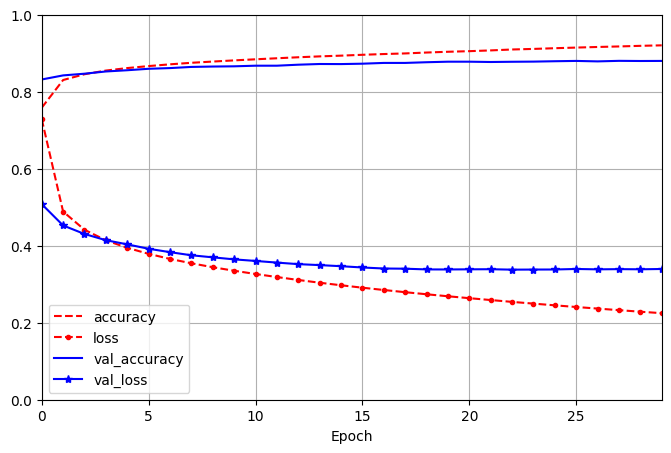

In [27]:
pd.DataFrame(history.history).plot(
 figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
plt.show()


In [ ]:
model.fit()

Building a Regression MLP Using the Sequential API
356